In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
data_frame = pd.read_csv('pima_data.txt')

In [3]:
data_frame.shape

(768, 10)

In [4]:
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
data_frame.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
print data_frame.isnull().values.any()

False


In [7]:
import seaborn as sns

C:\Users\Mithun\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Mithun\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


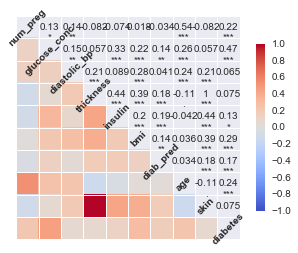

In [8]:
sns.corrplot(data_frame,annot=True)

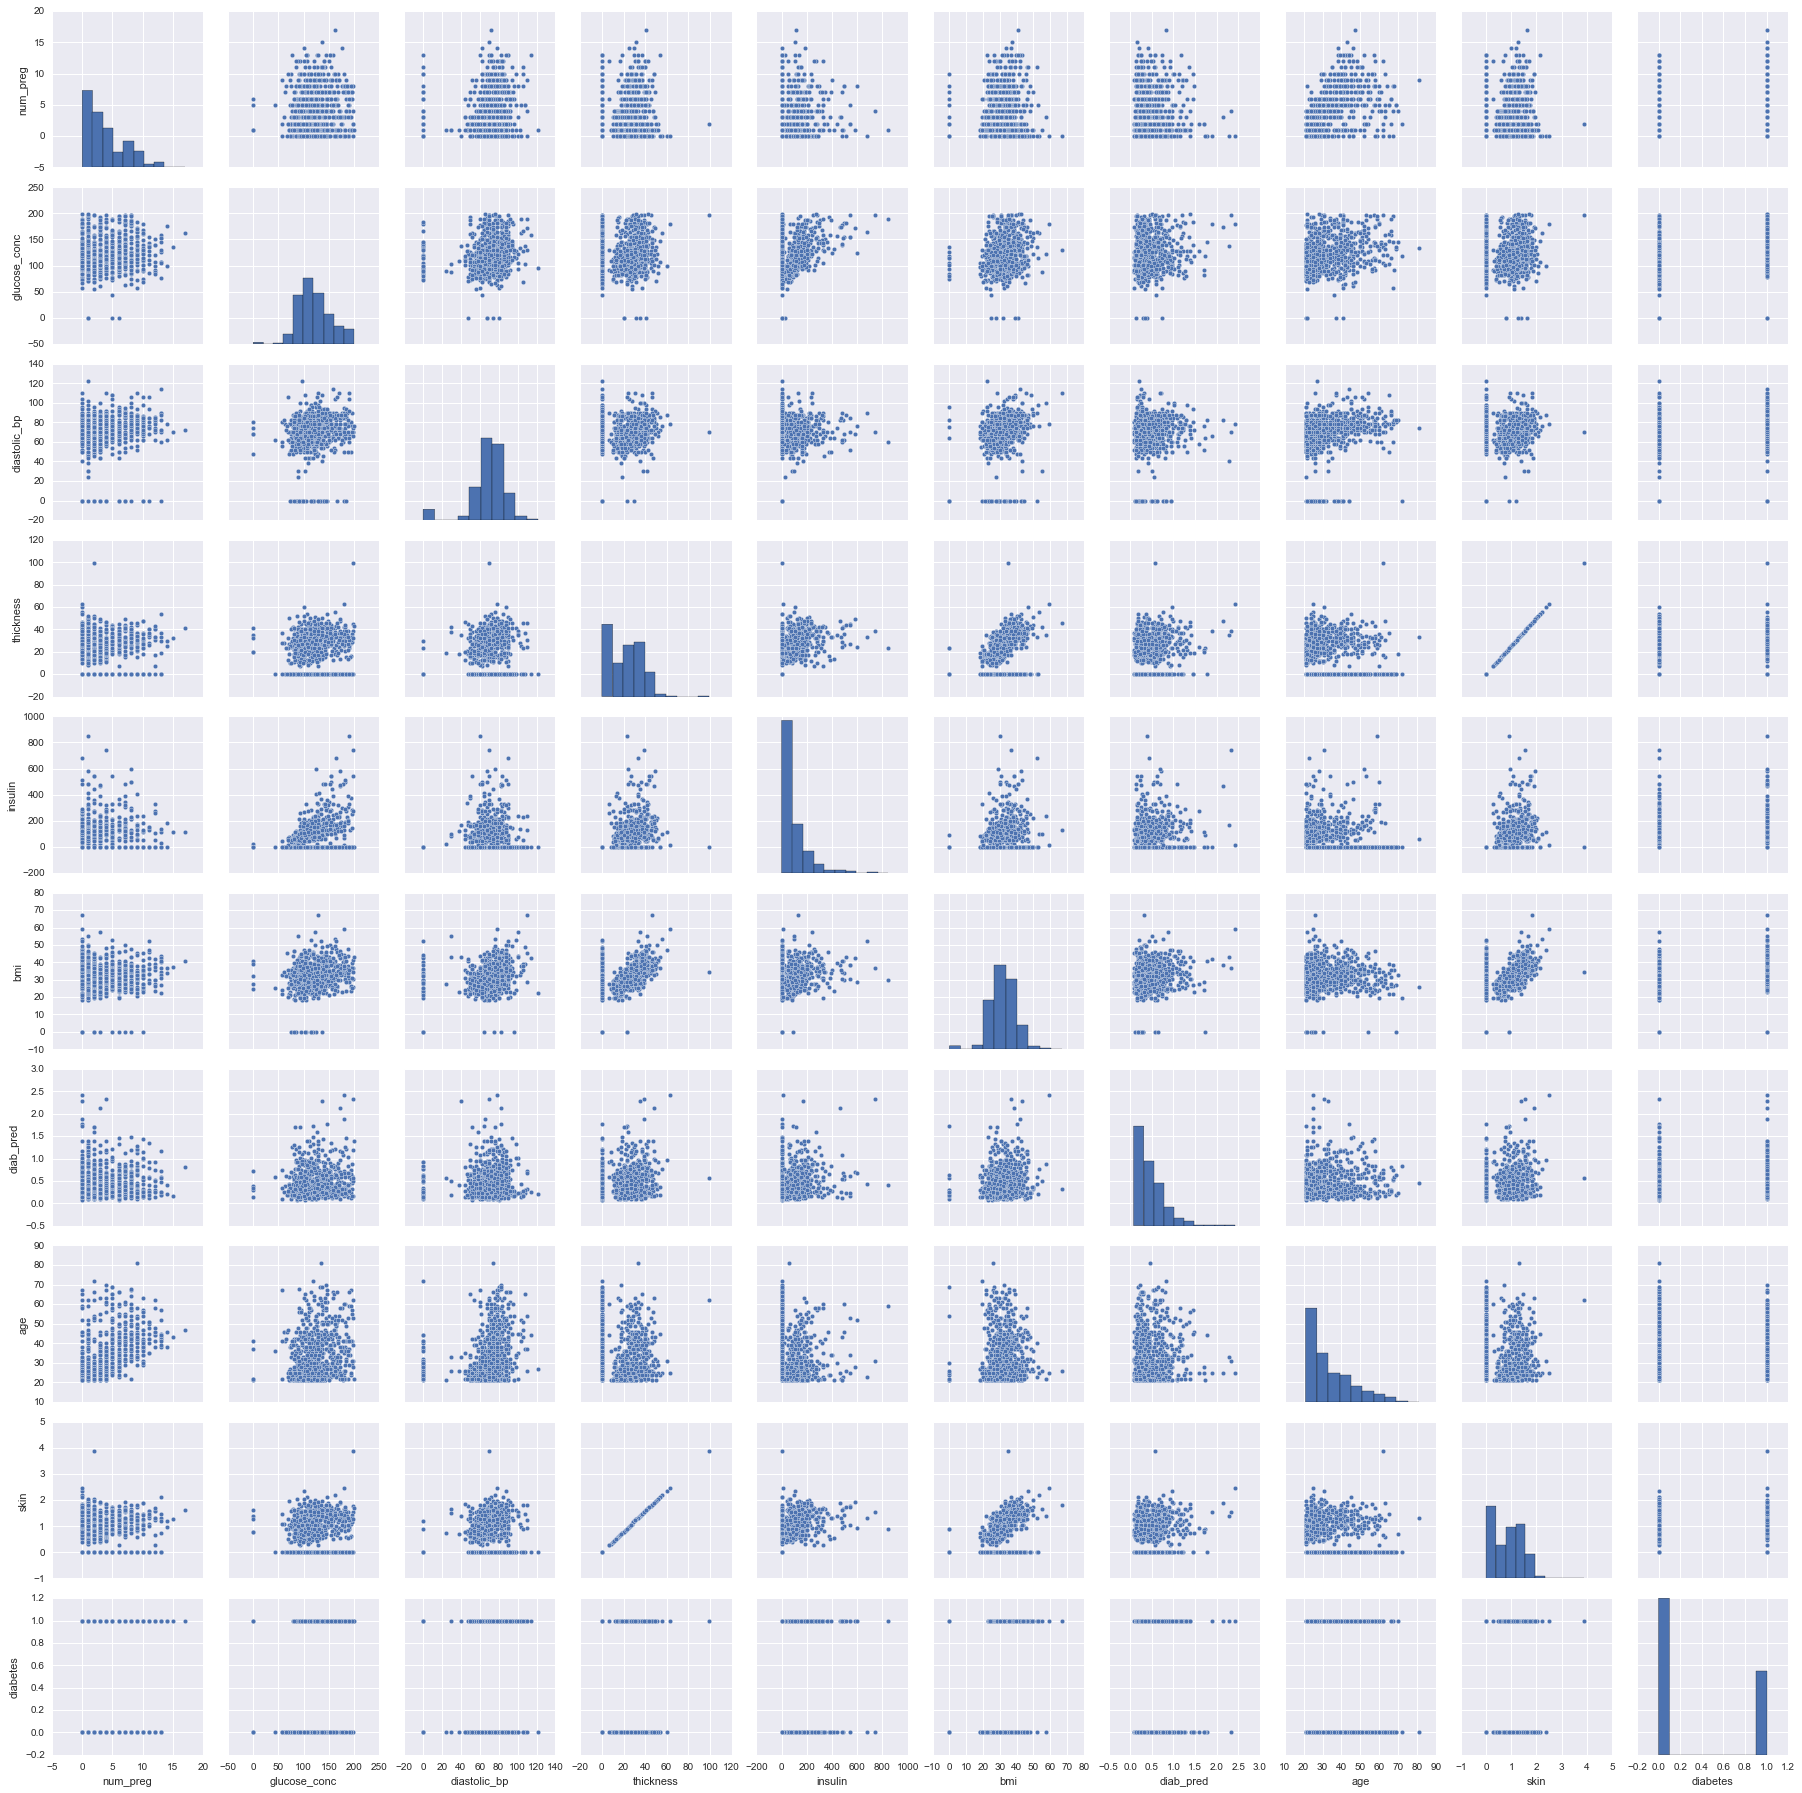

In [9]:
sns.pairplot(data_frame)

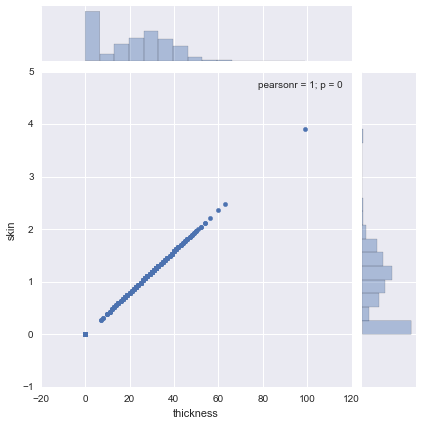

In [10]:
sns.jointplot(data_frame['thickness'],data_frame['skin'],kind='scatter')

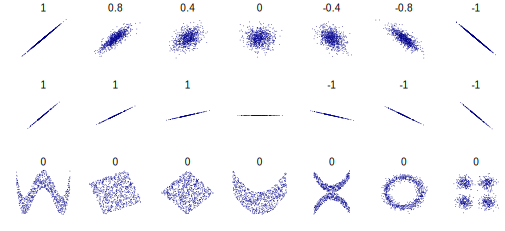

In [20]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [ ]:
del data_frame['skin']

In [23]:
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
map_diabetes = {True:1,False:0}

In [25]:
data_frame['diabetes']=data_frame['diabetes'].map(map_diabetes)

In [26]:
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
num_true = len(data_frame.loc[data_frame['diabetes']== 1])
num_false = len(data_frame.loc[data_frame['diabetes']== 0])

In [28]:
print num_true
print num_false

268
500


In [29]:
feature_column_names=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']

In [30]:
predicted_class_name=['diabetes']

In [31]:
#.values always create array of values::
X = data_frame[feature_column_names].values

In [32]:
from sklearn.cross_validation import train_test_split

In [33]:
y = data_frame[predicted_class_name].values

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print "{0:0.2f}% in training set".format(float(len(X_train)/float(len(data_frame)))*100)


69.92% in training set


In [35]:
#Checking missing value:
print "rows in dataframe:: {}".format(len(data_frame))
print "rows having zero value in glucose_conc:: {}".format(len(data_frame.loc[data_frame['glucose_conc']==0]))

rows in dataframe:: 768
rows having zero value in glucose_conc:: 5


In [36]:
from sklearn.preprocessing import Imputer

In [37]:
fill_0 = Imputer(missing_values=0,strategy="mean",axis=0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train.ravel())

GaussianNB()

In [40]:
prediction_from_trained_data = nb_model.predict(X_train)

In [41]:
from sklearn import metrics

In [42]:
accuracy = metrics.accuracy_score(y_train,prediction_from_trained_data)

In [43]:
print "Accuracy of our naive bayes model is:{0:.4f}".format(accuracy)

Accuracy of our naive bayes model is:0.7542


In [44]:
prediction_from_test_data = nb_model.predict(X_test)

In [45]:
accuracy = metrics.accuracy_score(y_test,prediction_from_test_data)

In [46]:
print "Accuracy of our naive bayes model is:{0:.4f}".format(accuracy)

Accuracy of our naive bayes model is:0.7359


In [47]:
#Performance testing for Classification type model:

print "Confusion Matrix"

print "{}".format(metrics.confusion_matrix(y_test,prediction_from_test_data,labels=[1,0]))
print "{}".format(metrics.classification_report(y_test,prediction_from_test_data,labels=[1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



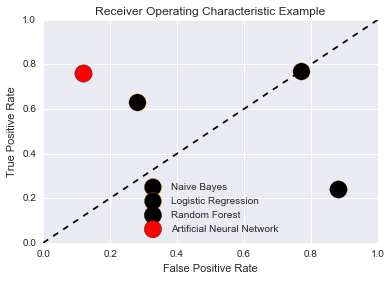

In [49]:
#ROC Curve Plotting:::

naive_bayes = np.array([0.28,0.63])
logistic = np.array([0.77,0.77])
random_forest = np.array([0.88,0.24])
ann = np.array([0.12,0.76])

plt.scatter(naive_bayes[0],naive_bayes[1],label='Naive Bayes',facecolors='black',edgecolors='orange',s=300)
plt.scatter(logistic[0],logistic[1],label='Logistic Regression',facecolors='black',edgecolors='orange',s=300)
plt.scatter(random_forest[0],random_forest[1],label='Random Forest',facecolors='black',edgecolors='black',s=300)
plt.scatter(ann[0],ann[1],label='Artificial Neural Network',facecolors='red',edgecolors='black',s=300)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower center')


In [50]:
#Using new Algorithm
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier()

In [58]:
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rf_predict_train = rf_model.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train,rf_predict_train)

In [63]:
print 'Accuracy {0:.4f}'.format(rf_accuracy)

Accuracy 0.9814


In [67]:
rf_predict_test = rf_model.predict(X_test)
rf_accuracy_test_data = metrics.accuracy_score(y_test,rf_predict_test)

In [68]:
print 'Accuracy {0:.4f}'.format(rf_accuracy_test_data)

Accuracy 0.6797


In [70]:
print 'Accuracy {0:.4f}'.format(rf_accuracy_test_data)
print 'Confusion matrix for random forest'

print '{}'.format(metrics.confusion_matrix(y_test,rf_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,rf_predict_test,labels=[1,0]))

Confusion matrix for random forest
[[ 41  39]
 [ 35 116]]

Classification Report

             precision    recall  f1-score   support

          1       0.54      0.51      0.53        80
          0       0.75      0.77      0.76       151

avg / total       0.68      0.68      0.68       231



In [72]:
#Regularization Hypermeter Tuning:

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [73]:
print 'Confusion matrix for LogisticRegression'

print '{}'.format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))

Confusion matrix for LogisticRegression
[[ 44  36]
 [ 23 128]]

Classification Report

             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



1st max value of 0.613 occured at C=1.400


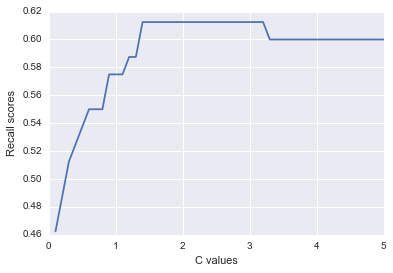

In [76]:
#Value calculation of regularization parameter:

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values,recall_scores = [],[]

C_val = C_start

best_recall_score = 0

while(C_val<C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val, random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score>best_recall_score):
        best_recall_score=recall_score
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print "1st max value of {0:0.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val)

plt.plot(C_values,recall_scores,"-")
plt.xlabel("C values")
plt.ylabel("Recall scores")
    
    

1st max value of 0.738 occured at C=0.300


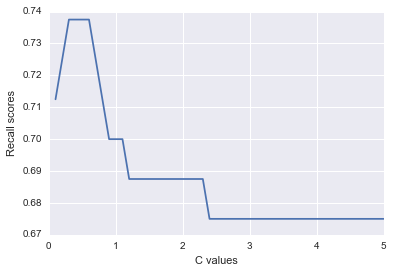

In [78]:
#Value calculation of regularization parameter with class weight "balanced":

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values,recall_scores = [],[]

C_val = C_start

best_recall_score = 0

while(C_val<C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val, class_weight="balanced",random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score>best_recall_score):
        best_recall_score=recall_score
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print "1st max value of {0:0.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val)

plt.plot(C_values,recall_scores,"-")
plt.xlabel("C values")
plt.ylabel("Recall scores")

In [79]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=best_score_C_val,class_weight="balanced",random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)


print 'Confusion matrix for LogisticRegression'

print '{}'.format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))

Confusion matrix for LogisticRegression
[[ 59  21]
 [ 45 106]]

Classification Report

             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



In [80]:
#K-fold/N-Fold Cross Validation:

from sklearn.linear_model import LogisticRegressionCV
lr_model = LogisticRegressionCV(n_jobs=1,Cs=3,cv=10,refit=False,class_weight="balanced",random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)


print 'Confusion matrix for LogisticRegression'

print '{}'.format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))

Confusion matrix for LogisticRegression
[[ 54  26]
 [ 43 108]]

Classification Report

             precision    recall  f1-score   support

          1       0.56      0.68      0.61        80
          0       0.81      0.72      0.76       151

avg / total       0.72      0.70      0.71       231

